<a href="https://colab.research.google.com/github/rashida3/StockMarket/blob/main/KSE_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVES**
The primary objective of this analysis is to explore KSE-100 index over time, highlighting different trends and patterns present in dataset. Moreover, developing a simple linear regression model to predict stock price for upcoming days based on past trends.

**Dataset Information**
The dataset was obtained from Standard Capital website for KSE-100 from 01_Jan-2001 to 12_Jan-2024. The dataset consists of Date, Open price, High, low and close price along with volume and change(%).
Features: historical prices, volume, technical indicators
Target Variable: Closing Price

**Analysis Overview**
1. Summary Statistics:measures of central tendency, dispersion, and other descriptive statistics
2. Time Series Plot: This provides a bird's eye view of how the KSE-100 index has evolved over the given period.
3. Distribution of Daily Returns: This analysis aids in understanding the volatility of the market
4. Moving Averages: Such as the 50-day and 200-day averages, to identify trends and potential crossovers. This can offer insights into the market's short-term and long-term performance.
5. Volume Analysis: Analyzed the 'Volume' column to identify patterns or trends in trading activity. Plotting volume alongside 'Close' prices provides additional context for market dynamics.
6. Seasonal Decomposition: Used seasonal decomposition to break down the time series data into trend, seasonality, and residual components. This technique helps reveal underlying patterns within the market
7. Correlation Analysis:  Focused on how 'Close' prices correlate with other numerical variables like 'Open', 'High', 'Low', and 'Volume'.
8. Histograms and KDE Plots:Visualized the distributions of numerical columns through histograms and kernel density estimate (KDE) plots. This aids in understanding the spread of data.
9. Outlier Detection: Identified and investigated potential outliers in the dataset, especially within 'Close' prices or 'Volume'. Outliers can significantly impact the predictive analysis, and their detection is crucial for accurate insights.
10. Yearly/Monthly Analysis:Aggregate the data on a yearly or monthly basis and perform further EDA on these subsets to uncover recurring patterns or trends within specific timeframes.
11. Event Impact Analysis: Analyzed the impact of significant events (e.g., War on Terror, financial crunch, Covid-19, Russia-Ukraine War) on the stock market. Plotted key metrics around these events to understand their influence on market behavior.
12.  Feature Engineering: Created new features that might enhance prediction (e.g., moving averages, technical indicators).
13. Train-Test Split: Splitted dataset into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance.
14. Model Selection: Although there are may models such as
i) Linear Models: Linear Regression, LASSO, Ridge Regression.
ii) Tree-Based Models: Decision Trees, Random Forests.
iii) Time Series Models: ARIMA, SARIMA.
iv) Machine Learning Models: Gradient Boosting (e.g., XGBoost), LSTM, GRU.
But I have used simple linear regression model
15. Model Training: Train the SLRM model using the training dataset.
16. Model Evaluation: Evaluate the model's performance on the testing set using appropriate metrics (Mean Absolute Error, Mean Squared Error).
17. Hyperparameter Tuning: Fine-tuned the model's hyperparameters to improve performance.

**What's Next?**
1. Feature Importance: If applicable, analyze feature importance to understand which features contribute the most to predictions.
2. Prediction: Make predictions on unseen data using the trained model.
3. Visualization:
Visualize the predicted values against the actual values to assess model accuracy.
4. Use other models like i) Linear Models:LASSO, Ridge Regression. ii) Tree-Based Models: Decision Trees, Random Forests. iii) Time Series Models: ARIMA, SARIMA. iv) Machine Learning Models: Gradient Boosting (e.g., XGBoost), LSTM, GRU.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('KSE100Price.csv')

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Change
0,1-Jan-2001,"1,507.00","1,520.67","1,500.69","1,517.95","152,402,832",10.36
1,2-Jan-2001,"1,517.94","1,551.70","1,517.94","1,522.16","243,470,880",4.21
2,3-Jan-2001,"1,517.94","1,550.42","1,517.94","1,550.42","221,411,648",28.26
3,4-Jan-2001,"1,550.42","1,561.64","1,546.08","1,550.04","213,918,640",-0.38
4,5-Jan-2001,"1,550.04","1,565.67","1,543.96","1,545.90","196,956,064",-4.14


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Change
5692,8-Jan-2024,"64,684.23","65,069.43","64,183.52","64,237.02","314,518,273",-277.87
5693,9-Jan-2024,"64,536.58","64,786.35","63,878.21","64,170.57","253,614,365",-66.45
5694,10-Jan-2024,"64,234.83","64,550.94","63,873.63","63,919.84","336,520,914",-250.73
5695,11-Jan-2024,"64,057.49","64,700.97","63,914.94","64,617.56","364,838,715",697.72
5696,12-Jan-2024,"64,917.06","65,356.85","64,491.08","64,637.63","402,808,230",20.07


In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [ ]:
df.shape

(5697, 7)

In [ ]:
df.dtypes

Date      object
Open      object
High      object
Low       object
Close     object
Volume    object
Change    object
dtype: object

In [ ]:
float_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change']
df[float_columns] = df[float_columns].replace({',': ''}, regex=True).astype(float)

In [ ]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
Change           float64
dtype: object

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Change
count,5697.000000,5697.000000,5697.000000,5697.000000,5.697000e+03,5697.000000
mean,22618.046475,22764.783277,22460.163365,22608.971717,1.813968e+08,11.149091
std,16348.355038,16436.661212,16233.431764,16333.259749,1.572860e+08,296.724639
min,0.000000,1087.320000,1069.550000,1075.160000,0.000000e+00,-2534.120000
25%,9181.000000,9183.140000,9125.150000,9178.790000,8.186910e+07,-77.230000
50%,15154.640000,15201.270000,15027.150000,15122.730000,1.326650e+08,9.100000
75%,39882.600000,40125.750000,39659.430000,39868.550000,2.293545e+08,104.690000
max,66764.300000,67093.960000,66121.130000,66426.780000,1.492189e+09,2446.320000


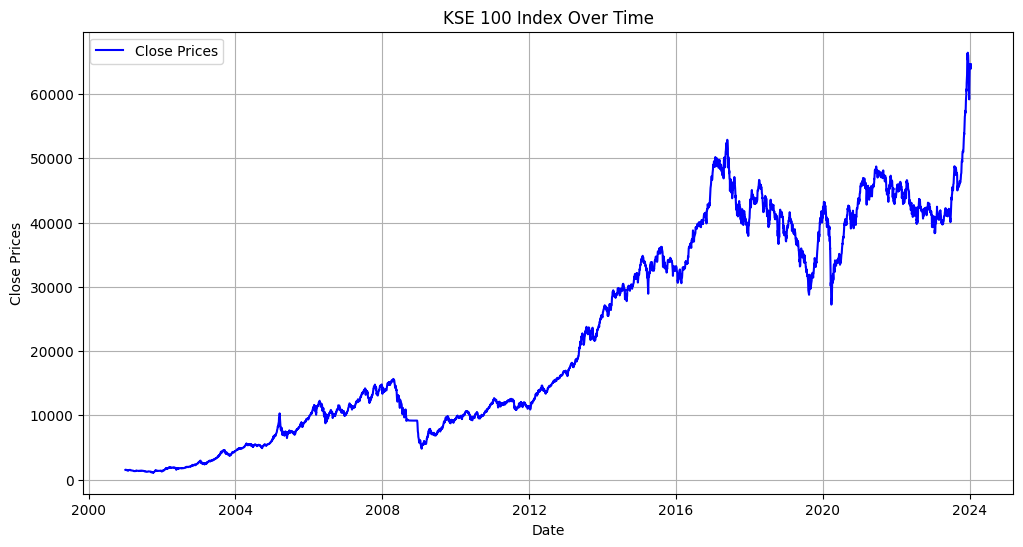

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Prices', color='Blue')
plt.title('KSE 100 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.grid(True)
plt.show()

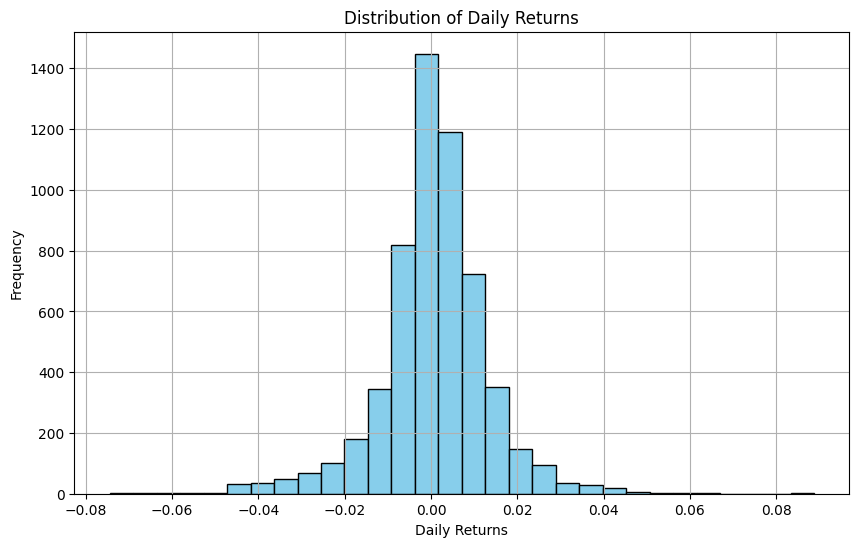

In [ ]:
df['Daily_Returns'] = df['Close'].pct_change()

# Plotting the distribution of daily returns
plt.figure(figsize=(10, 6))
df['Daily_Returns'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

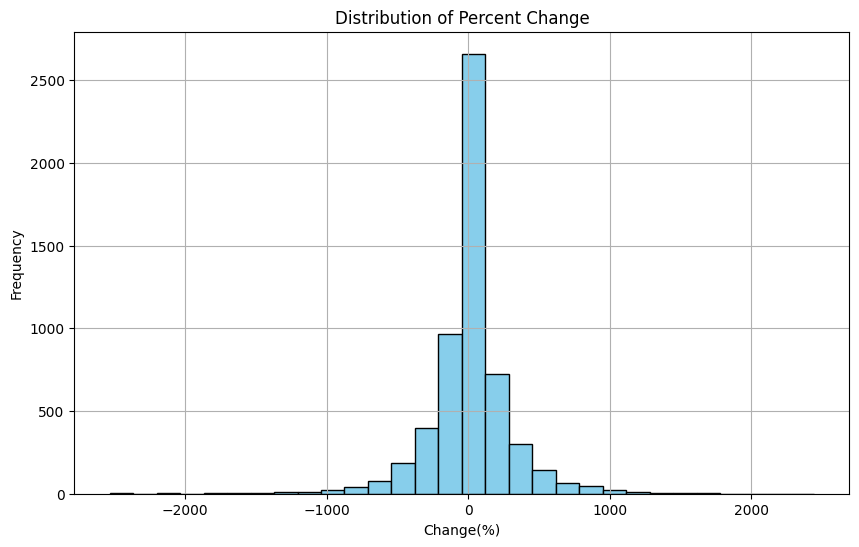

In [ ]:
# Plotting the distribution of percent change
plt.figure(figsize=(10, 6))
df['Change'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Percent Change')
plt.xlabel('Change(%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

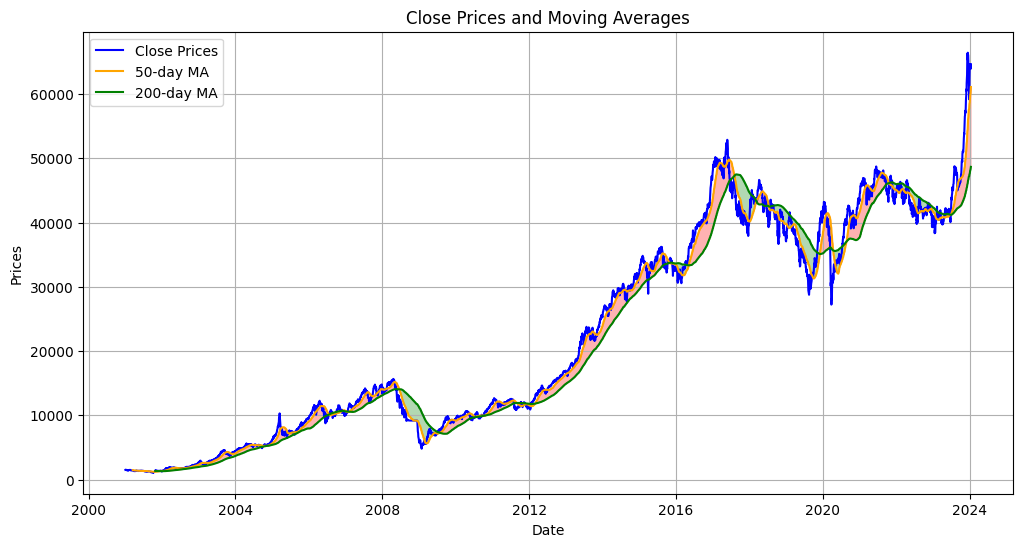

In [ ]:
# Calculating moving averages. Moving averages smooth out fluctuations in data to highlight trends over time.
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Plotting the Close prices and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Prices', color='blue')
plt.plot(df['Date'], df['MA_50'], label='50-day MA', color='orange')
plt.plot(df['Date'], df['MA_200'], label='200-day MA', color='green')

# Highlight crossovers (50-day crosses above 200-day and vice versa)
plt.fill_between(df['Date'], df['MA_50'], df['MA_200'], where=(df['MA_50'] > df['MA_200']), color='red', alpha=0.3, interpolate=True)
plt.fill_between(df['Date'], df['MA_50'], df['MA_200'], where=(df['MA_50'] <= df['MA_200']), color='green', alpha=0.3, interpolate=True)

plt.title('Close Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()
# the filled areas serve as a visual cue for crossovers. When the 50-day MA is above the 200-day MA, the region between the curves is shaded in red,
#indicating a potential bullish signal. Conversely, when the 50-day MA is below the 200-day MA, the region is shaded in green, suggesting a potential bearish signal.
#Traders and analysts often use these crossovers to make decisions about buying or selling assets.

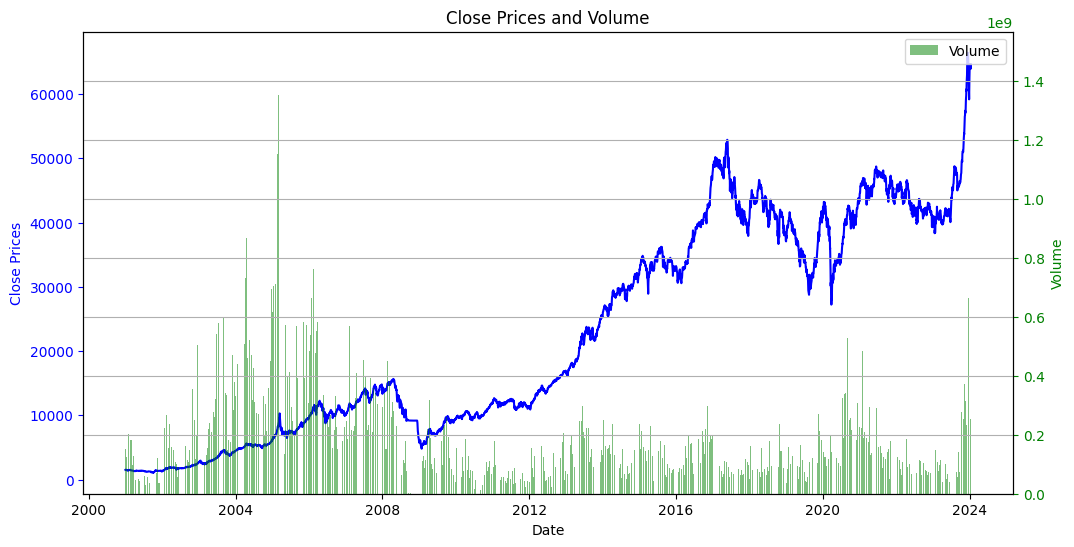

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting 'Close' prices on the primary y-axis
ax1.plot(df['Date'], df['Close'], label='Close Prices', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Prices', color='blue')
ax1.tick_params('y', colors='blue')

#A secondary y-axis for 'Volume'
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], alpha=0.5, label='Volume', color='green')
ax2.set_ylabel('Volume', color='green')
ax2.tick_params('y', colors='green')

plt.title('Close Prices and Volume')
plt.legend()
plt.grid(True)
plt.show()

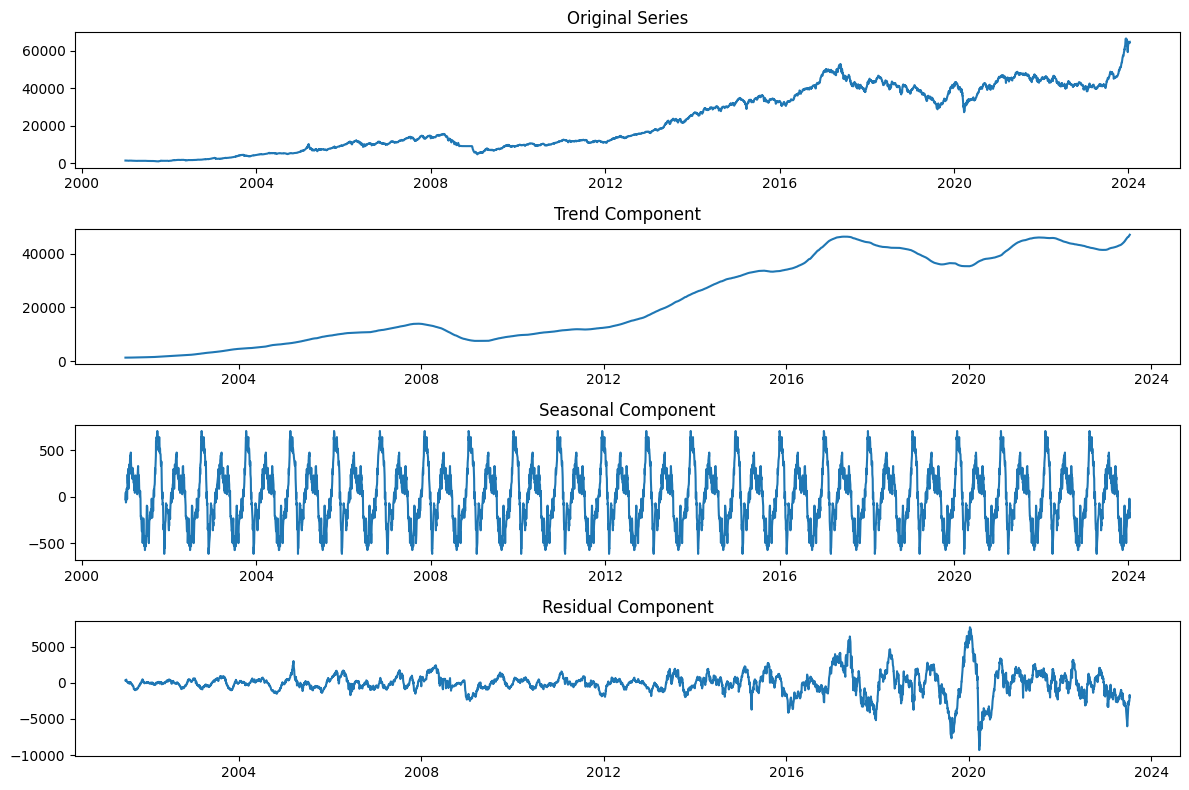

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.set_index('Date')['Close'], model='additive', period=252)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Date'], df['Close'], label='Original Series')
plt.title('Original Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

Correlation Matrix:
           Close      Open      High       Low    Volume
Close   1.000000  0.999831  0.999931  0.999941 -0.208209
Open    0.999831  1.000000  0.999922  0.999895 -0.209406
High    0.999931  0.999922  1.000000  0.999911 -0.207898
Low     0.999941  0.999895  0.999911  1.000000 -0.209604
Volume -0.208209 -0.209406 -0.207898 -0.209604  1.000000


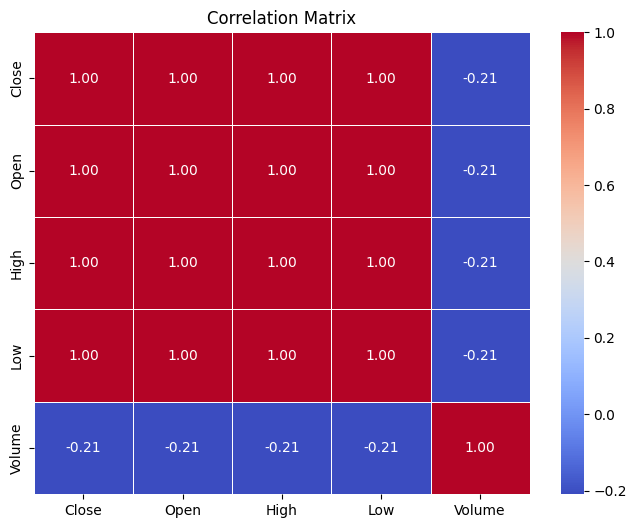

In [ ]:
correlations = df[['Close', 'Open', 'High', 'Low', 'Volume']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlations)

# Optional: Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

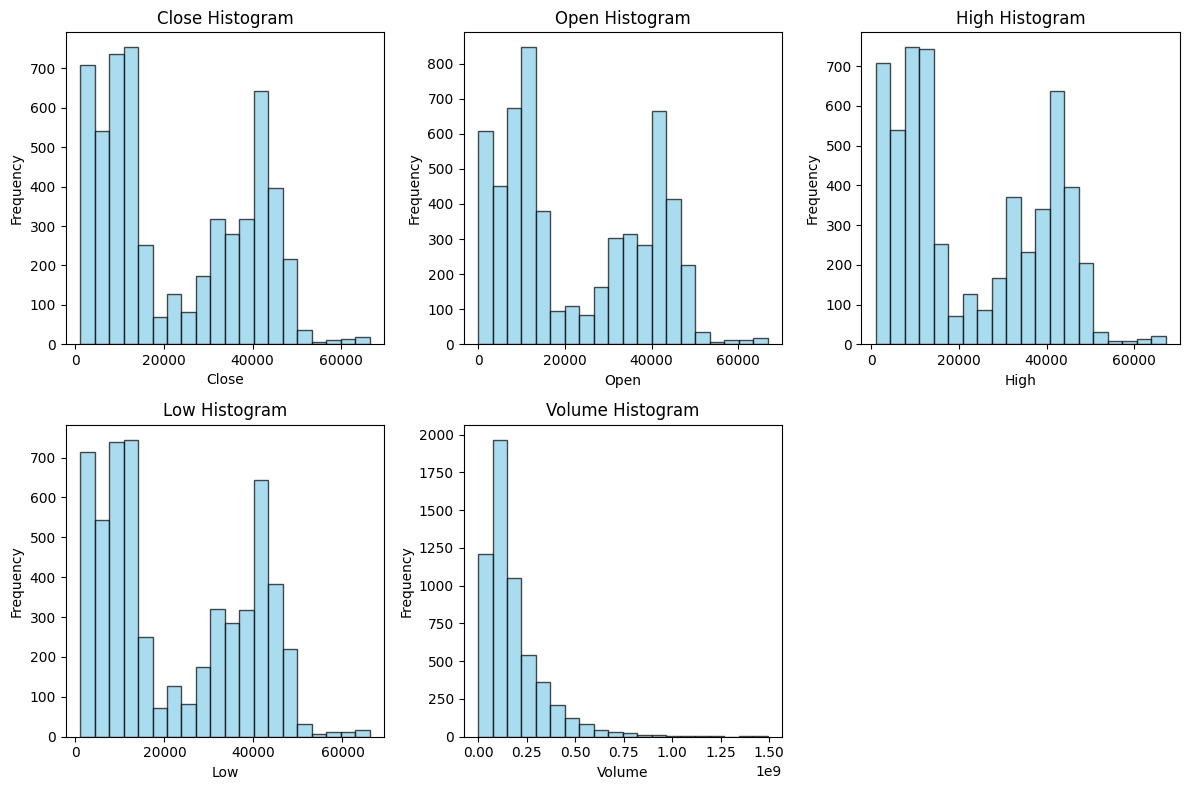

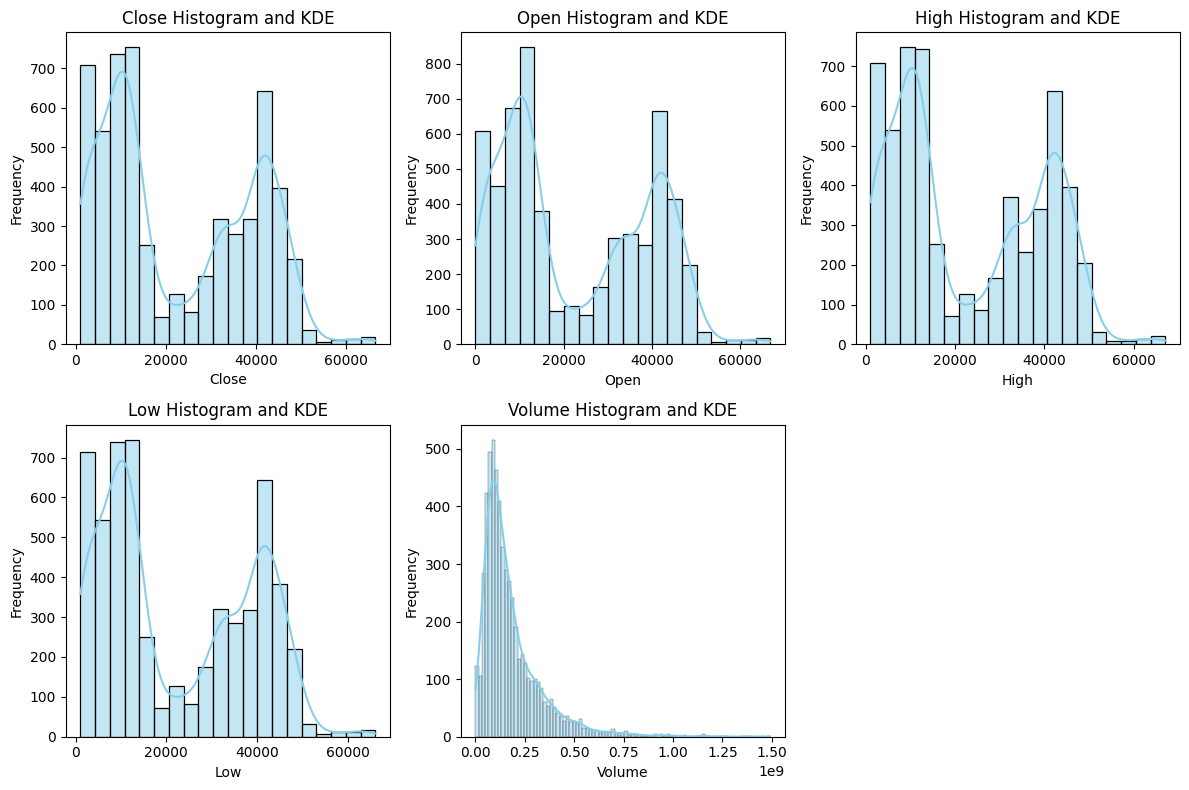

In [ ]:
numerical_columns = ['Close', 'Open', 'High', 'Low', 'Volume']

plt.figure(figsize=(12, 8))

# Using matplotlib
for column in numerical_columns:
    plt.subplot(2, 3, numerical_columns.index(column) + 1)
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Using seaborn
plt.figure(figsize=(12, 8))

for column in numerical_columns:
    plt.subplot(2, 3, numerical_columns.index(column) + 1)
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{column} Histogram and KDE')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

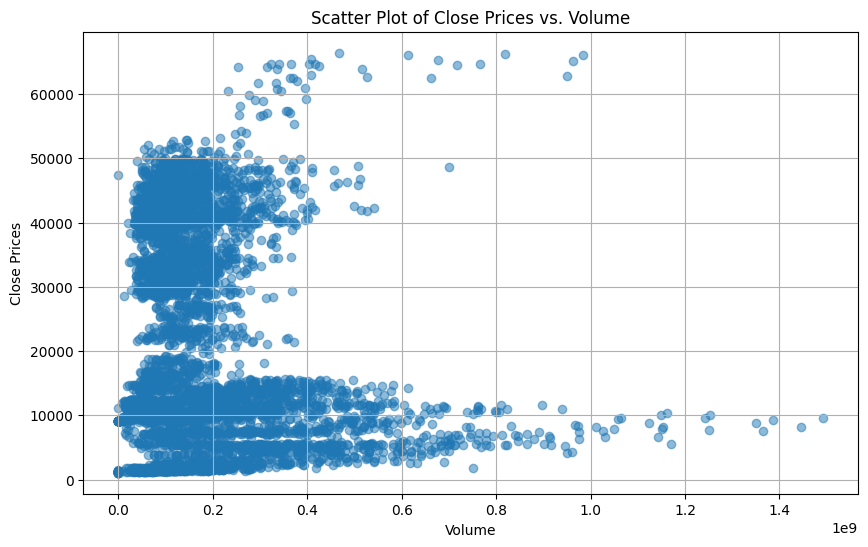

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Scatter Plot of Close Prices vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Close Prices')
plt.grid(True)
plt.show()

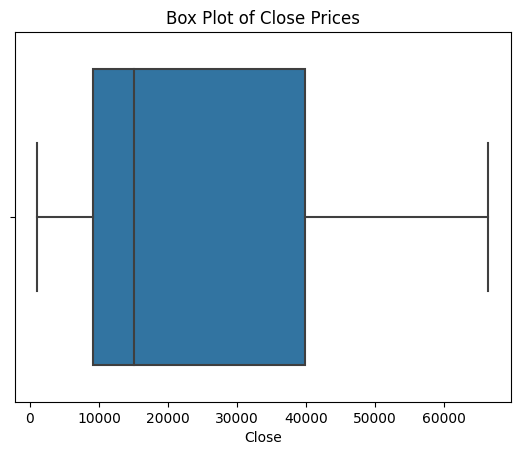

In [ ]:
sns.boxplot(x=df['Close'])
plt.title('Box Plot of Close Prices')
plt.show()

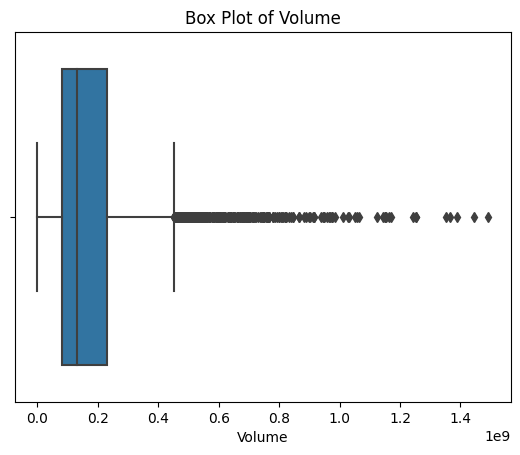

In [ ]:
sns.boxplot(x=df['Volume'])
plt.title('Box Plot of Volume')
plt.show()

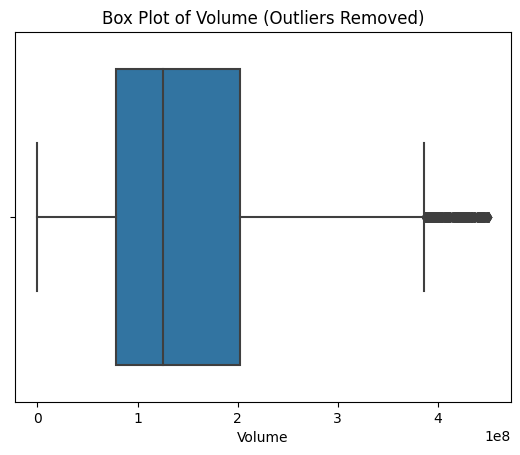

In [ ]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with 'Volume' values outside the bounds
df_no_outliers = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)]

# Plot the boxplot again after removing outliers
sns.boxplot(x=df_no_outliers['Volume'])
plt.title('Box Plot of Volume (Outliers Removed)')
plt.show()

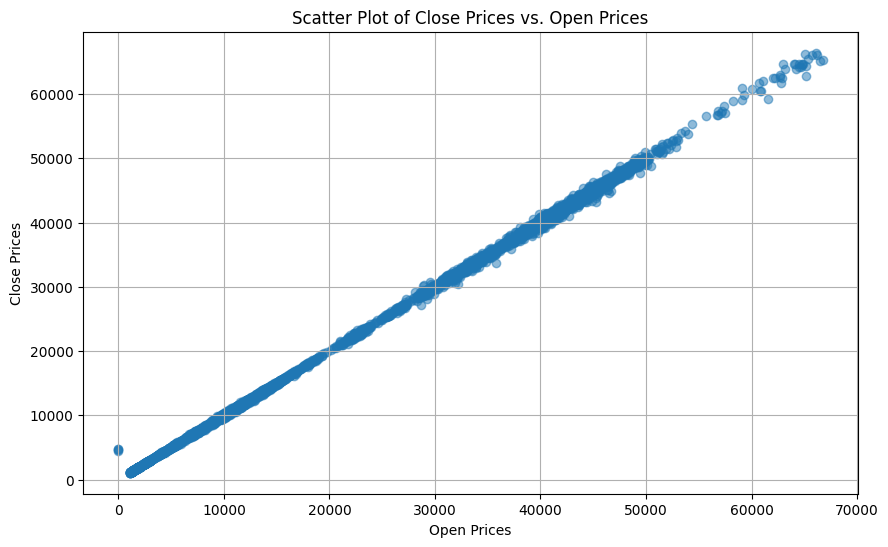

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], alpha=0.5)
plt.title('Scatter Plot of Close Prices vs. Open Prices')
plt.xlabel('Open Prices')
plt.ylabel('Close Prices')
plt.grid(True)
plt.show()

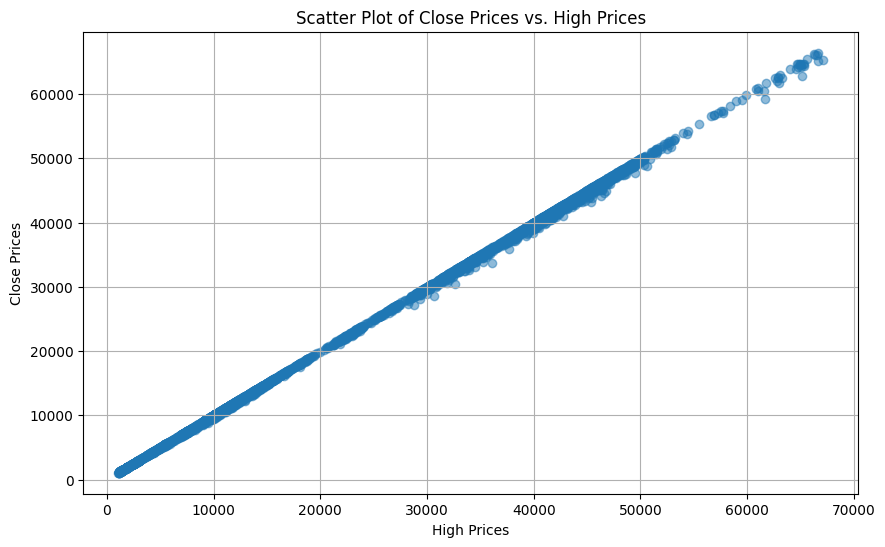

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['High'], df['Close'], alpha=0.5)
plt.title('Scatter Plot of Close Prices vs. High Prices')
plt.xlabel('High Prices')
plt.ylabel('Close Prices')
plt.grid(True)
plt.show()

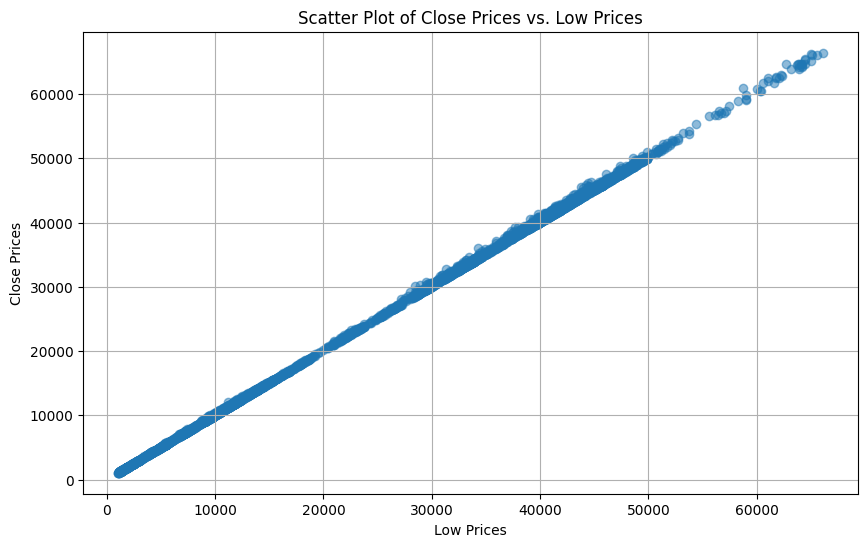

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Low'], df['Close'], alpha=0.5)
plt.title('Scatter Plot of Close Prices vs. Low Prices')
plt.xlabel('Low Prices')
plt.ylabel('Close Prices')
plt.grid(True)
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample Data on a Yearly Basis
df_yearly = df.resample('Y').mean()

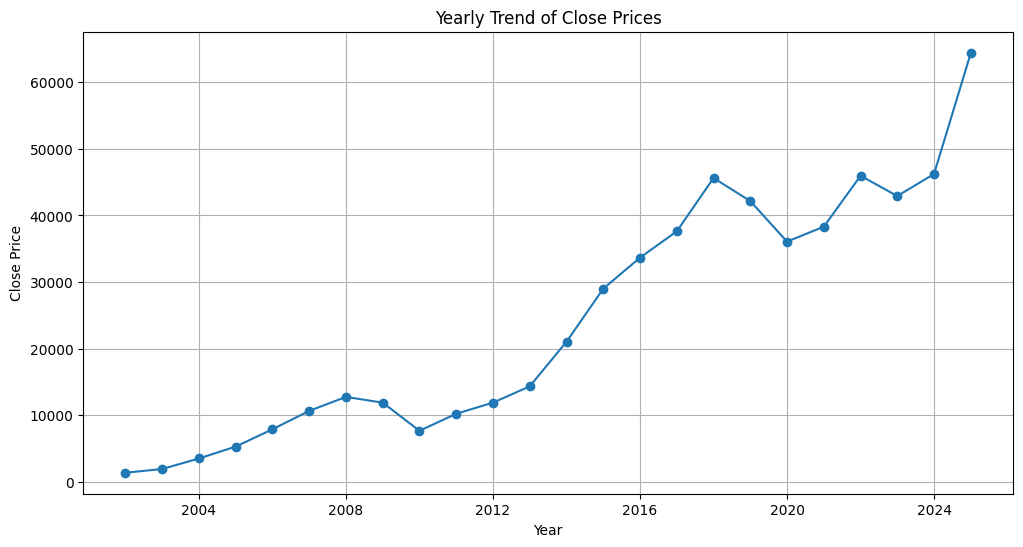

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_yearly['Close'], marker='o', linestyle='-')
plt.title('Yearly Trend of Close Prices')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [ ]:
df_monthly = df.resample('M').mean()

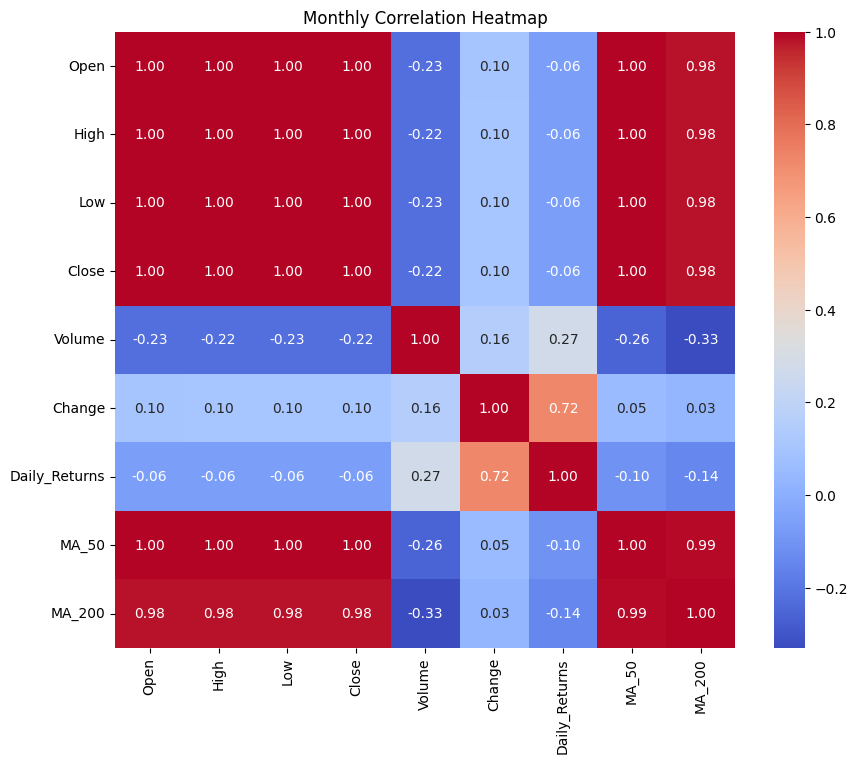

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df_monthly.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Monthly Correlation Heatmap')
plt.show()

<ipython-input-349-53883f22f286>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2001 = df['2001']


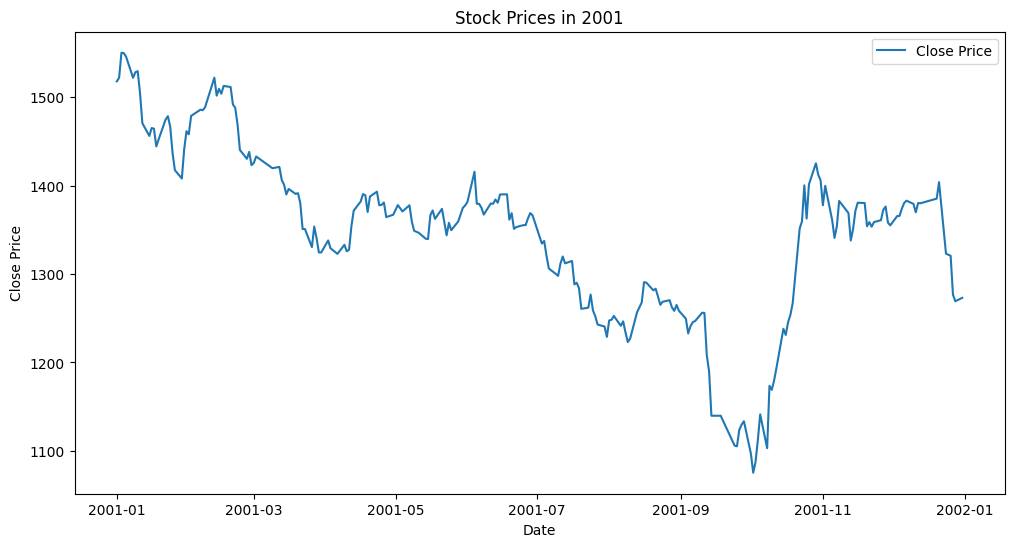

In [ ]:
df_2001 = df['2001']
plt.figure(figsize=(12, 6))
plt.plot(df_2001['Close'], label='Close Price')
plt.title('Stock Prices in 2001')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

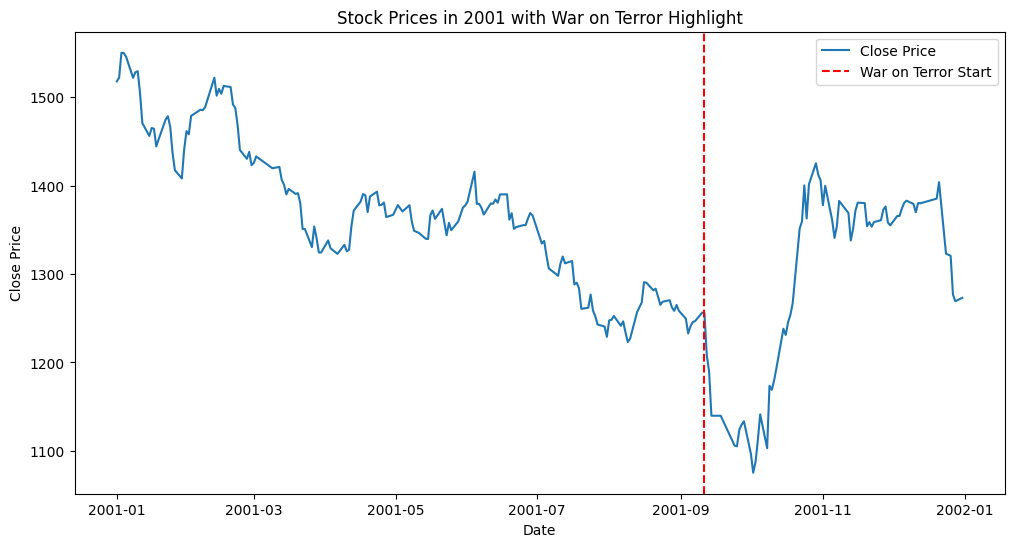

In [ ]:
war_start = pd.to_datetime('2001-09-11')

plt.figure(figsize=(12, 6))
plt.plot(df_2001['Close'], label='Close Price')
plt.axvline(x=war_start, color='red', linestyle='--', label='War on Terror Start')
plt.title('Stock Prices in 2001 with War on Terror Highlight')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

<ipython-input-351-b5629234c32d>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2020 = df['2020']


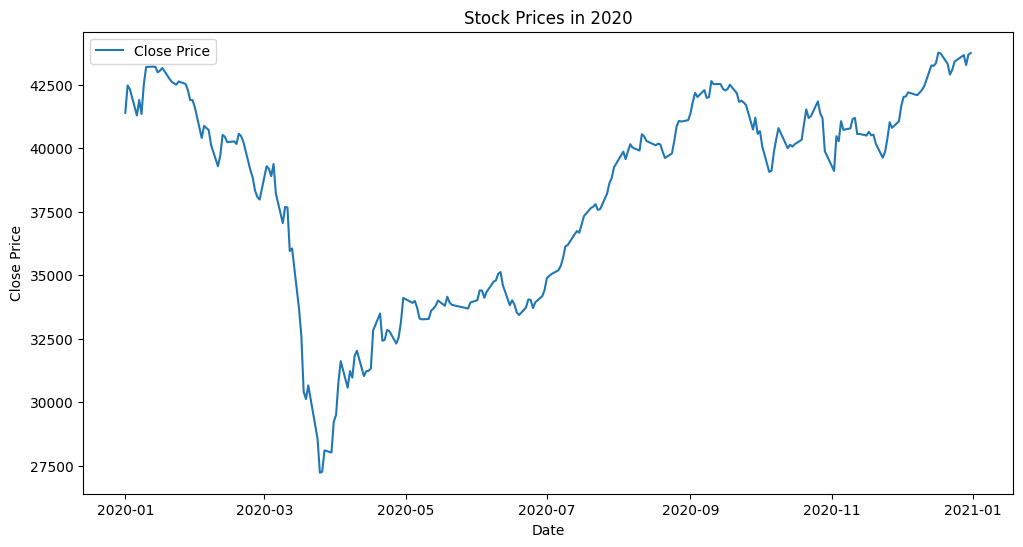

In [ ]:
df_2020 = df['2020']
plt.figure(figsize=(12, 6))
plt.plot(df_2020['Close'], label='Close Price')
plt.title('Stock Prices in 2020')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

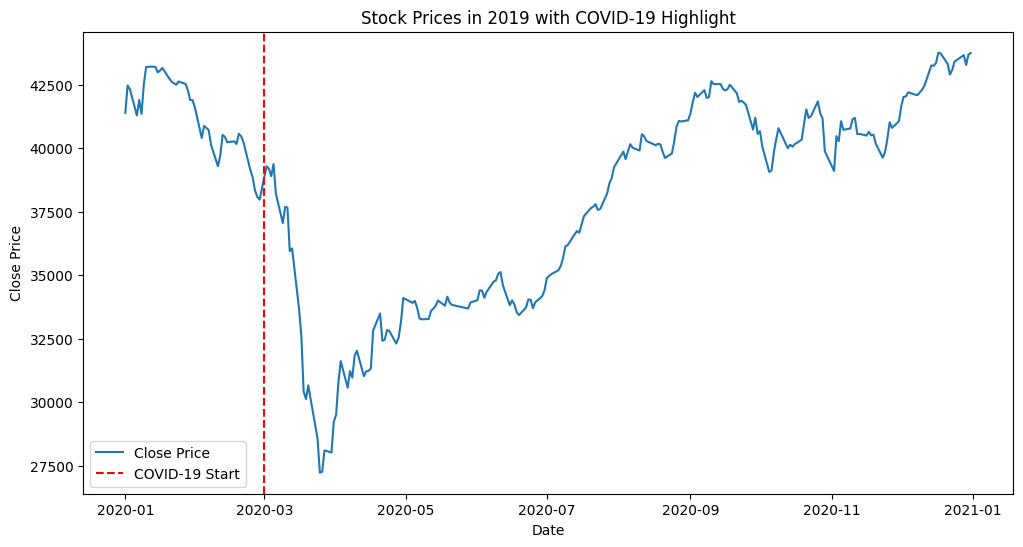

In [ ]:
covid_start = pd.to_datetime('2020-03-01')

plt.figure(figsize=(12, 6))
plt.plot(df_2020['Close'], label='Close Price')
plt.axvline(x=covid_start, color='red', linestyle='--', label='COVID-19 Start')
plt.title('Stock Prices in 2019 with COVID-19 Highlight')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

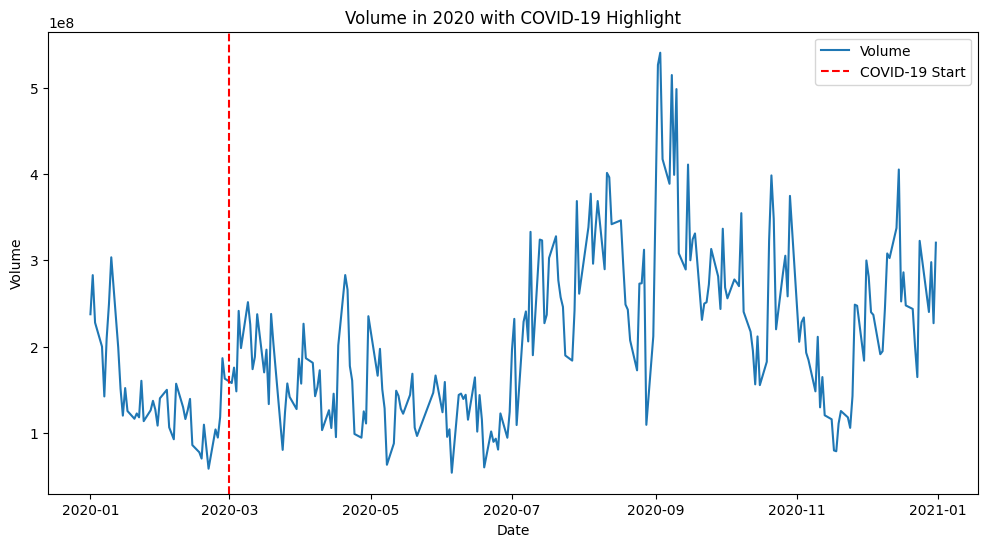

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_2020['Volume'], label='Volume')
plt.axvline(x=covid_start, color='red', linestyle='--', label='COVID-19 Start')
plt.title('Volume in 2020 with COVID-19 Highlight')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

<ipython-input-354-f68bc8cb53e0>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2008 = df['2008']


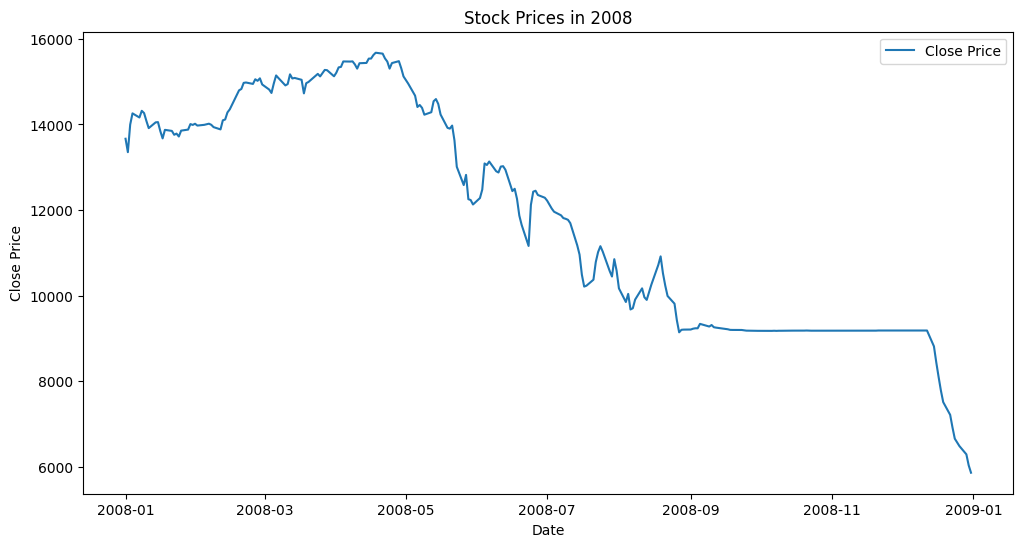

In [ ]:
df_2008 = df['2008']
plt.figure(figsize=(12, 6))
plt.plot(df_2008['Close'], label='Close Price')
plt.title('Stock Prices in 2008')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

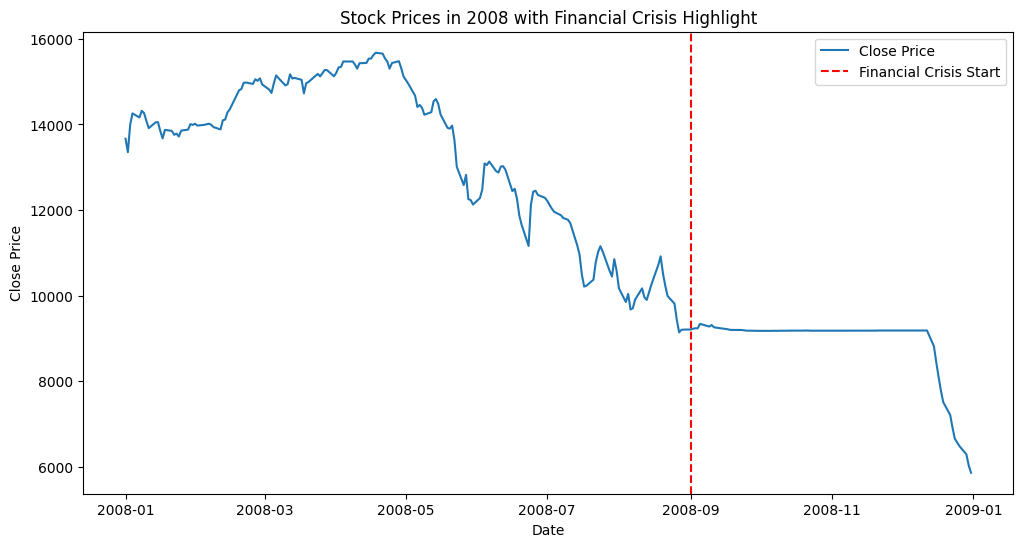

In [ ]:
financial_crisis_start = pd.to_datetime('2008-09-01')

plt.figure(figsize=(12, 6))
plt.plot(df_2008['Close'], label='Close Price')
plt.axvline(x=financial_crisis_start, color='red', linestyle='--', label='Financial Crisis Start')
plt.title('Stock Prices in 2008 with Financial Crisis Highlight')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

<ipython-input-356-4dd18cfeb95f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2021 = df['2021']


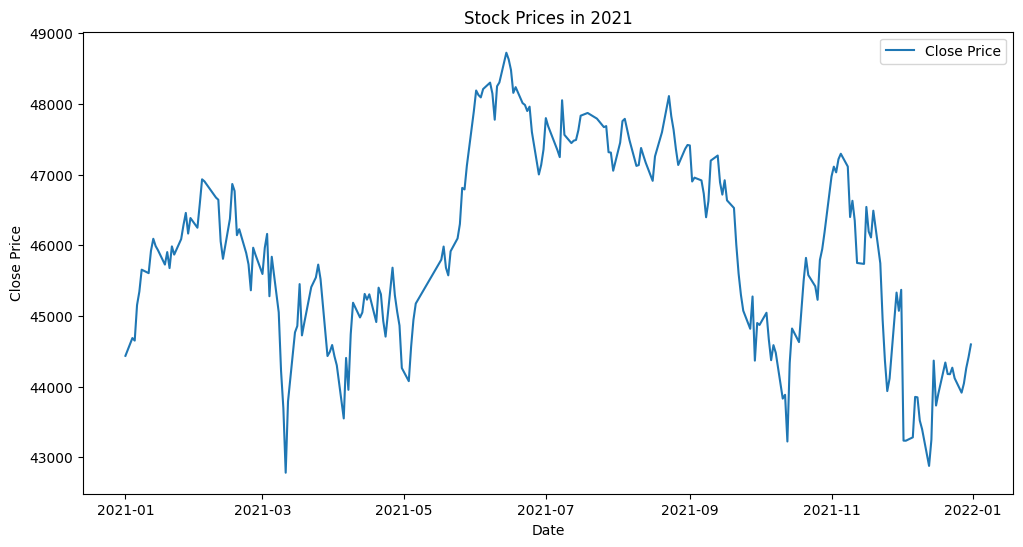

In [ ]:
df_2021 = df['2021']
plt.figure(figsize=(12, 6))
plt.plot(df_2021['Close'], label='Close Price')
plt.title('Stock Prices in 2021')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

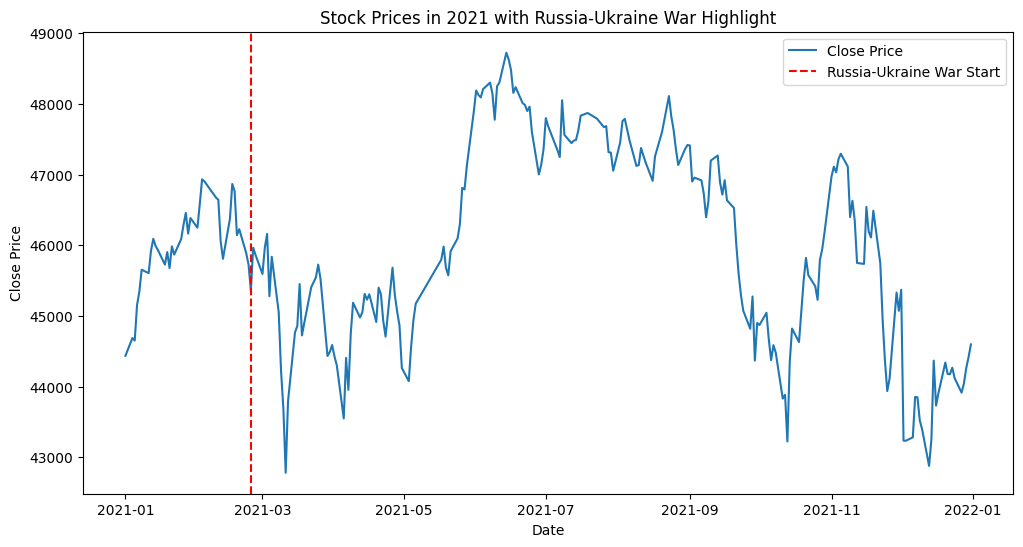

In [ ]:
war_start = pd.to_datetime('2021-02-24')

plt.figure(figsize=(12, 6))
plt.plot(df_2021['Close'], label='Close Price')
plt.axvline(x=war_start, color='red', linestyle='--', label='Russia-Ukraine War Start')
plt.title('Stock Prices in 2021 with Russia-Ukraine War Highlight')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
df_no_outliers.shape

(5352, 10)

In [ ]:
df1=df_no_outliers

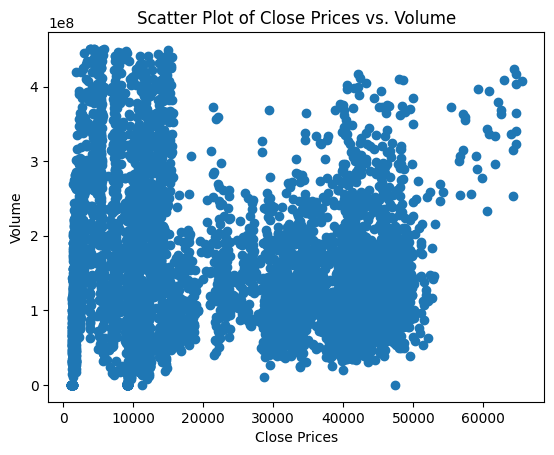

In [ ]:
#After having removed outliers from volume
plt.scatter(df1['Close'], df1['Volume'])
plt.title('Scatter Plot of Close Prices vs. Volume')
plt.xlabel('Close Prices')
plt.ylabel('Volume')
plt.show()

In [ ]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change',
       'Daily_Returns', 'MA_50', 'MA_200'],
      dtype='object')

In [ ]:
df1.head()

,Date,Open,High,Low,Close,Volume,Change,Daily_Returns,MA_50,MA_200
0,2001-01-01,1507.00,1520.67,1500.69,1517.95,152402832.0,10.36,NaN,NaN,NaN
1,2001-01-02,1517.94,1551.70,1517.94,1522.16,243470880.0,4.21,0.002773,NaN,NaN
2,2001-01-03,1517.94,1550.42,1517.94,1550.42,221411648.0,28.26,0.018566,NaN,NaN
3,2001-01-04,1550.42,1561.64,1546.08,1550.04,213918640.0,-0.38,-0.000245,NaN,NaN
4,2001-01-05,1550.04,1565.67,1543.96,1545.90,196956064.0,-4.14,-0.002671,NaN,NaN


In [ ]:
df1.tail()

,Date,Open,High,Low,Close,Volume,Change,Daily_Returns,MA_50,MA_200
5692,2024-01-08,64684.23,65069.43,64183.52,64237.02,314518273.0,-277.87,-0.004307,60080.5620,48208.01240
5693,2024-01-09,64536.58,64786.35,63878.21,64170.57,253614365.0,-66.45,-0.001034,60345.0968,48319.49505
5694,2024-01-10,64234.83,64550.94,63873.63,63919.84,336520914.0,-250.73,-0.003907,60593.8352,48430.62380
5695,2024-01-11,64057.49,64700.97,63914.94,64617.56,364838715.0,697.72,0.010916,60847.7810,48547.06185
5696,2024-01-12,64917.06,65356.85,64491.08,64637.63,402808230.0,20.07,0.000311,61093.6810,48665.65775


In [ ]:
df1.describe()

,Open,High,Low,Close,Volume,Change,Daily_Returns,MA_50,MA_200
count,5352.000000,5352.000000,5352.000000,5352.000000,5.352000e+03,5352.000000,5351.000000,5303.000000,5153.000000
mean,23358.116411,23507.630181,23196.025506,23347.614135,1.521295e+08,9.193266,0.000454,23334.244614,23351.809954
std,16281.303401,16369.309266,16169.379947,16267.731025,9.877104e+07,300.548724,0.012551,16029.030162,15598.493122
min,0.000000,1087.320000,1069.550000,1075.160000,0.000000e+00,-2534.120000,-0.074493,1210.291400,1316.115300
25%,9510.847500,9606.782500,9386.482500,9491.255000,7.894964e+07,-82.847500,-0.005089,9768.383500,9968.811850
50%,17704.915000,17775.365000,17619.525000,17718.570000,1.255740e+08,6.495000,0.000636,17530.404000,18132.008700
75%,40233.312500,40437.152500,39923.842500,40184.802500,2.019359e+08,105.957500,0.006724,40336.673900,39659.060050
max,65323.060000,65622.550000,64491.080000,65450.180000,4.504072e+08,2446.320000,0.088795,61093.681000,48665.657750


Mean Squared Error: 17104.797401826658


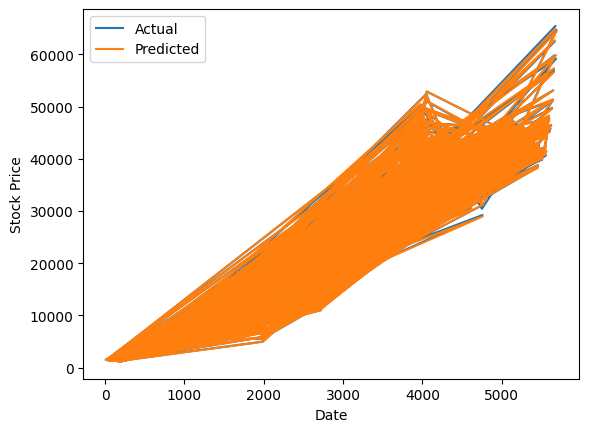

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df1[['Open', 'High', 'Low', 'Volume']]
y = df1['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualization
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

R-squared: 0.9999355340625292
Mean Absolute Error (MAE): 73.50715099501559
Root Mean Squared Error (RMSE): 130.78531034419217


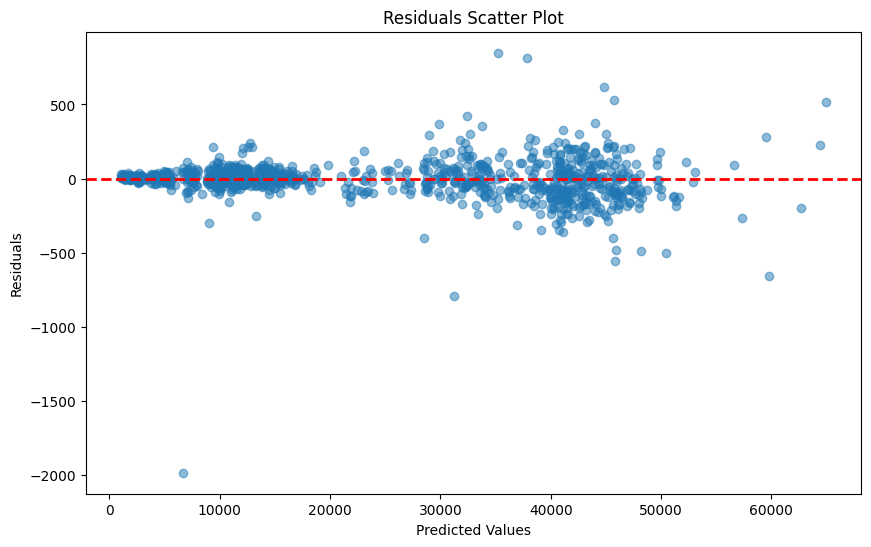

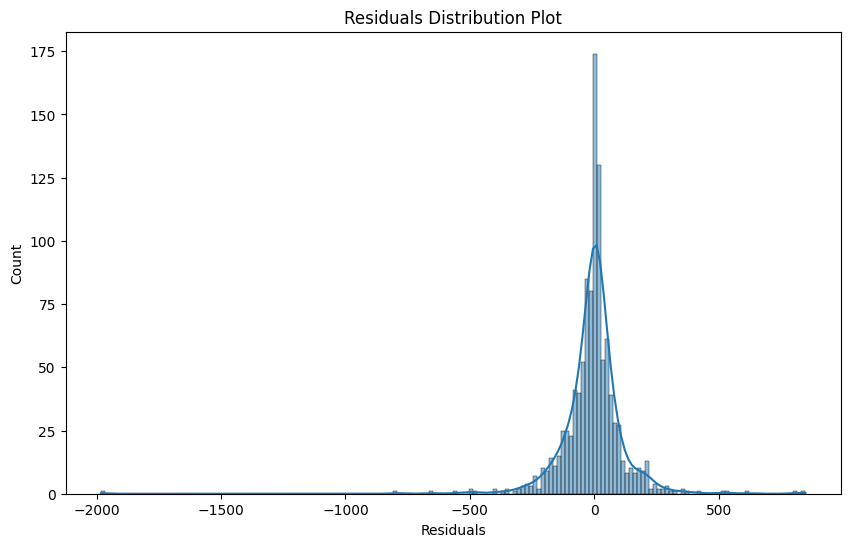

In [ ]:
residuals = y_test - predictions

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.title('Residuals Scatter Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at y=0
plt.show()

# Residuals distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution Plot')
plt.xlabel('Residuals')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared errors to positive (for consistency)
cv_scores = -cv_scores

print("Cross-Validation Scores:")
print(cv_scores)

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"\nMean Cross-Validation Score: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score}")

Cross-Validation Scores:
[43357.63536211  3139.01297907  4889.91769032 29858.54874969
 37957.60811289]

Mean Cross-Validation Score: 23840.54457881455
Standard Deviation of Cross-Validation Scores: 16757.71082046547


In [ ]:
model = LinearRegression()

scoring_metrics = {
    'R-squared': make_scorer(r2_score),
    'MAE': make_scorer(mean_absolute_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
}

#Perform cross-validation (5-fold cross-validation) for each metric
for metric_name, scorer in scoring_metrics.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring=scorer)

    print(f"{metric_name} Scores:")
    print(cv_scores)

    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    print(f"\nMean {metric_name} Score: {mean_cv_score}")
    print(f"Standard Deviation of {metric_name} Scores: {std_cv_score}\n")

R-squared Scores:
[0.99423602 0.99944    0.99991418 0.99894705 0.99878387]

Mean R-squared Score: 0.9982642258637906
Standard Deviation of R-squared Scores: 0.002052683682858812

MAE Scores:
[ 29.90482275  40.15929915  51.85573161 127.95962204 148.74416454]

Mean MAE Score: 79.7247280183674
Standard Deviation of MAE Scores: 48.81478198638513

RMSE Scores:
[208.22496335  56.02689514  69.92794642 172.7962637  194.82712366]

Mean RMSE Score: 140.36063845398363
Standard Deviation of RMSE Scores: 64.33844691632406



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Create a model with hyperparameters to tune (Ridge regression with alpha)
model = Ridge()

# Define hyperparameters and their possible values
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_search.best_estimator_

Best Hyperparameters: {'alpha': 10.0}


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_model = Ridge(alpha=10.0)

final_model.fit(X_train, y_train)

predictions = final_model.predict(X_test)

# Evaluate the final model's performance
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on Test Set: {mse}")


Mean Squared Error on Test Set: 17104.797091164182
